# Chebyshev's Theorem, Sample Size

Complete this problem set with your group (up to 4 students). You can either hand-write your work and submit a hard copy, or go to File -> Download as HTML to generate an HTML file, then either submit it online or as a hard copy. Each group only needs to submit one copy and will receive the same grade. 

This team homework is based on Lecture 28: Designing Experiments and related to Homework 9: Sample Sizes and Confidence Intervals. 

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 
- [Sample Size](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html)


In [64]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
from math import ceil

### Chebychev's Bounds

Chevychev's theorem states that regardless of the distribution, the proportion of data values that are within $z$ standard deviations of the mean, i.e. within the range $mean \pm z\cdot  SDs$ is at least $1 -\frac{1}{z^2}$, where $z>1$. In mathematical notation, this is equivalent to:

$P(\frac{|X - \mu|}{SD} < z) \ge 1 -\frac{1}{z^2}$

The following example compares Chebychev's bounds with results from a right-skewed distribution. 

0.9864864864864865


0.84

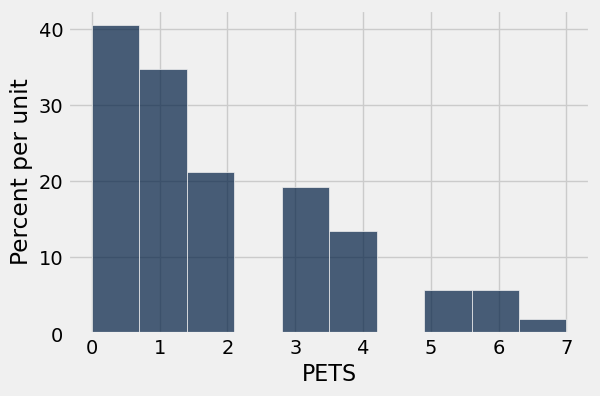

In [2]:
students = Table().read_table('student_data.csv')
students.hist('PETS')
pets = students.column('PETS')
m = np.average(pets)
s = np.std(pets)
# this is how you combine two conditions in np.count_nonzero
print(np.count_nonzero(np.logical_and(pets <= m+2.5*s, pets >= m-2.5*s)) / len(pets))
1 - 1/2.5**2

At least what proportion should be within 1.5 standard deviation of the mean, according to the Chebychev's theorem? (Note: this number should be less than what's calculated above)

In [5]:
print(np.count_nonzero(np.logical_and(pets <= m+1.5*s, pets >= m-1.5*s)) / len(pets))
1 - 1/1.5**2

0.9054054054054054


0.5555555555555556

Do a similar comparison for $z=2$ and $z=3$. In each case, show the actual proportion from the data and the lower bound from Chevychev's theorem. 

In [6]:
print(np.count_nonzero(np.logical_and(pets <= m+3*s, pets >= m-3*s)) / len(pets))
1 - 1/3**2

1.0


0.8888888888888888

### Sample Size for Estimating Means

The relationship between the sample size and the width of the confiden interval was shown to be 

$ width = 4\cdot \frac{SD}{\sqrt{\texttt{n}}}$, where $n$ is the sample size. 

If you solve for $n$ from the formula above, what is the equation that gives you the sample size based on the width of the interval? 

In [24]:
# n = (4*SD/width)**2

# SD is estimated by sample standard deviation 
# width is given by the user, e.g. 2*error

# calculate the sample size based on your formula
 
SD = np.std(students.column('AGE'))
n = (4*SD/1)**2
n

683.8626734842951

Earlier in the semester, we used the student data to construct a 95% confidence interval for the average age, with a width of the interval being 2.96 years. Using the SD of the student data as an approximation for the population standard deviation, calculate the sample size required to bring the width of the 95% confidence interval down to 1 year. 

In [7]:
bootstrap_means = make_array()
for i in np.arange(10000):
    bootstrap_means = np.append(bootstrap_means, np.average(students.sample().column('AGE')))




In [20]:
#Table().with_column('bootstrap means', bootstrap_means).hist()
#students.num_rows
percentile(2.5, bootstrap_means), percentile(97.5, bootstrap_means)
#percentile(97.5, bootstrap_means) - percentile(2.5, bootstrap_means)
#from math import sqrt
#print(np.std(students.column('AGE')) / sqrt(74))

(21.0, 23.945945945945947)

Now test whether your sample size was sufficient by re-doing bootstrapping, this time by setting the sample size to be larger than the original sample size in `students.sample(n)` . Show the histogram of bootstrap means. 

What is the 95% confidence interval based on the bootstrap means? Does it have the desired width? Test it below by using the `percentile` function. 

### Sample Size for Estimating Proportions

Recall that given a population of binary values (also known as a ```Bernoulli``` distribution), the proportion of 1's can be seen as a mean of 0's and 1's. The following code randomly generates a population of 0's and 1's. Run it a few times and see what the standard deviation will be. 

In [35]:
p0 = 0.5
n = 1000
binary_population = np.random.binomial(1, p0, n)
np.std(binary_population)

0.49996399870390662

What is the largest possible standard deviation for a binary distribution? Based on the formula $width = 4\cdot \frac{SD}{\sqrt{\texttt{n}}}$, if we would like to keep the width of the confidence interval within 4%, how large a sample should we include? 

In [38]:
from scipy import stats
stats.norm.ppf(0.995)

2.5758293035489004

largest std deviation of binary distribution is 0.5 (achieved when prop = 0.5)

for 95% confidence level, and width = 0.04, the sample size was (4*0.5/0.04)^2  = 2500

for 99% confidence level and width = 0.04, the sample size was (2*2.58*0.5/0.04)^2 = 4160

Now use the code above to generate a binary distribution by setting ```n``` to the sample size you found above. Construct bootstrap confidence intervals from the population. What is the actual width of the confidence interval through bootstrapping? 

In [58]:
np.count_nonzero(students.sample(2500).column('SOCIAL')=='Yes') / 2500
import datetime


datetime.time(19, 6, 51, 581139)

In [59]:
import datetime
start_time = datetime.datetime.now()
bootstrap_props = make_array()
for i in np.arange(10000):
    bootstrap_props = np.append(bootstrap_props, np.count_nonzero(students.sample(2500).column('SOCIAL')=='Yes') / 2500)
print(datetime.datetime.now()-start_time)

0:03:33.731016


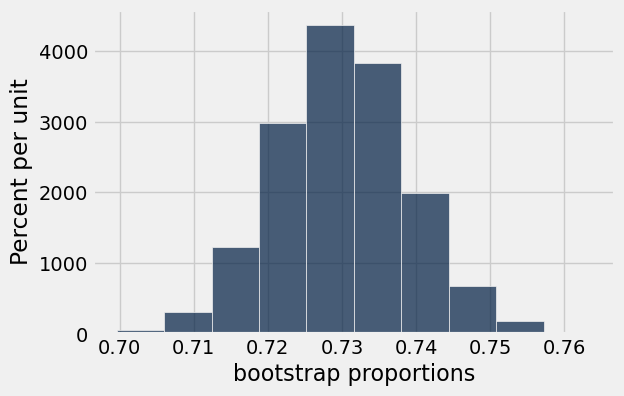

In [48]:
Table().with_column('bootstrap proportions', bootstrap_props).hist()

In [49]:
percentile(97.5, bootstrap_props) - percentile(2.5, bootstrap_props)

0.035200000000000009